**NAME:** COSME BELISARIO MARTINEZ ROBAYO

**SUBJECT:** _102778_ - Machine learning and quantum computers

## Exercise
Create a script that generates random data from different distributions. Compare: (a) a normal or Gaussian distribution for different values of the variance and mean, (b) a uniformly random distribution, (c) the beta distribution.

**Problem 1.** Estimate and compare the confidence intervals or error bars obtained for each distribution using Hoeffding's inequality and the Chebyshev inequality (for the latter one, you need to analyze or empirically estimate the variance).

**Problem 2.** When possible, compare your results to theoretical values.

**Problem 3.** For which distributions does the 68–95–99.7 rule hold? Provide answers via Jupyter notebooks in GitHub or similar hosting server.

In [52]:
### Different distributions ###
from scipy.stats import norm, uniform, beta
from random import random

N = 100
mean = (-1, 0, 1)
std = (1, 1.5, 2)

nor_1, nor_2, nor_3 = [norm.rvs(mean[i], std[i], N) for i in range(3)]
uni = uniform.rvs(0,  1, N)
bet = beta.rvs(2, 5, size=N)

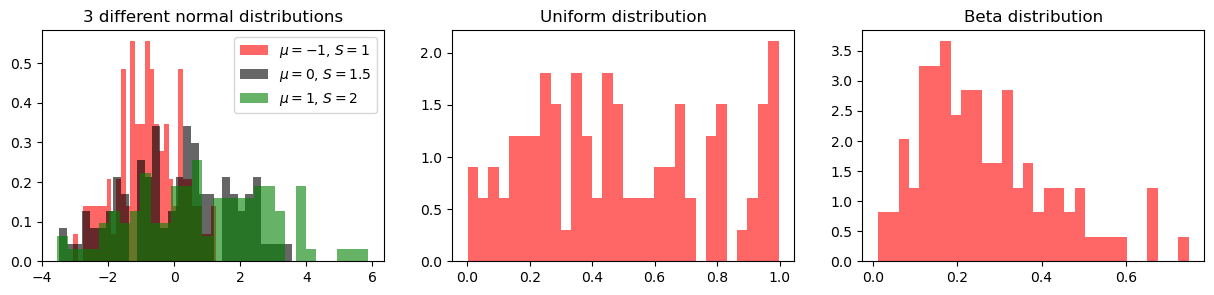

In [97]:
### Some graphical comparison ###
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize = (15, 3))
ax[0].hist(nor_1, bins=30, density=True, alpha=0.6, label = "$\mu=-1$, $S=1$", color= 'r')
ax[0].hist(nor_2, bins=30, density=True, alpha=0.6, label = "$\mu=0$, $S=1.5$", color= 'k')
ax[0].hist(nor_3, bins=30, density=True, alpha=0.6, label = "$\mu=1$, $S=2$", color= 'g')
ax[1].hist(uni, bins=30, density=True, alpha=0.6, color= 'r')
ax[2].hist(bet, bins=30, density=True, alpha=0.6, color= 'r')
ax[0].set_title("3 different normal distributions")
ax[1].set_title("Uniform distribution")
ax[2].set_title("Beta distribution")
ax[0].legend();

Then, I will use 5 distributions: 3 normal distributions, 1 uniform and 1 beta. For the CI calculations, I will estimate $\bar{X}$ and $\sigma_X$. For the last one I will use Boostrap.

In [54]:
### Estimated mean for each distribution ###
mean_norm_1 = nor_1.mean()
mean_norm_2 = nor_2.mean()
mean_norm_3 = nor_3.mean()
mean_uni = uni.mean()
mean_beta = bet.mean()
print('Estimated means for each distribution: ', end='\n'+'==='*10+'\n')
print(f'normal 1: {mean_norm_1}')
print(f'normal 2: {mean_norm_2}')
print(f'normal 3: {mean_norm_3}')
print(f'uniform: {mean_uni}')
print(f'beta: {mean_beta}')

Estimated means for each distribution: 
normal 1: -0.7998687859040006
normal 2: 0.054509786721926995
normal 3: 0.887878413683885
uniform: 0.49114114478872506
beta: 0.26585921817974006


In [55]:
### Boostrap method tho estimate variances ###
import numpy as np
def bootstrap_var(data, B=10000):
    n = len(data)
    vars_boot = []
    for _ in range(B):
        sample = np.random.choice(data, size=n, replace=True)
        vars_boot.append(np.var(sample, ddof=1)) 
    var_est = np.mean(vars_boot)   
    return var_est

var_norm_1 = bootstrap_var(nor_1)
var_norm_2 = bootstrap_var(nor_2)
var_norm_3 = bootstrap_var(nor_3)
var_uni = bootstrap_var(uni)
var_beta = bootstrap_var(bet)
print('Estimated variance for each distribution: ', end='\n'+'==='*10+'\n')
print(f'normal 1: {var_norm_1}')
print(f'normal 2: {var_norm_2}')
print(f'normal 3: {var_norm_3}')
print(f'uniform: {var_uni}')
print(f'beta: {var_beta}')

Estimated variance for each distribution: 
normal 1: 0.9039978742900273
normal 2: 2.700336533028267
normal 3: 4.134168437074683
uniform: 0.082672147713192
beta: 0.02450727776675268


Taking into account that the Hoeffding Inequality depends on the range of the function, I will give an estimate of it using 6 times the variance (3 times to the left of the mean and 3 times to the right of the mean) for the normal distributions, and 0 to 1 to the uniform and beta distributions:

In [66]:
### range for ditributions: b-a ###
range_norm_1 = 6*var_norm_1
range_norm_2 = 6*var_norm_2
range_norm_3 = 6*var_norm_3
range_uniform = 1
range_beta = 1

**Problem 1.** Estimate and compare the confidence intervals or error bars obtained for each distribution using Hoeffding's inequality and the Chebyshev inequality (for the latter one, you need to analyze or empirically estimate the variance).

**Hoeffding Inequality** Using the Hoeffding Inequality and establishing a $CI=95\%$, we start with $$ P(|\overline{X} - \mathbb{E}[\overline{X}]| \geq \epsilon) \leq 2e^{-\frac{2n^2\epsilon^2}{\sum_{i=1}^n(a_i - b_i)^2}} = 0.05$$

Taking into account that the range is the same for every value in the sample and every variable has the same distribution (in each case), we have:
Replacing values we have $$2e^{-\frac{2n^2\epsilon^2}{\sum_{i=1}^n(a_i - b_i)^2}} = 2e^{-\frac{2n\epsilon^2}{(b-a)^2}} = 0.05$$


$$\epsilon = (b-a)\sqrt{\frac{\log{(40)}}{2n}} $$

In [65]:
### For each distribution ###
def epsilon(range, n=N):
    return range*np.sqrt(np.divide(np.log(20), 2*n))
print(f'Values of epsilon for each distribution:', end='\n'+'==='*10+'\n')
print(f'normal 1: {epsilon(range_norm_1)}')
print(f'normal 2: {epsilon(range_norm_2)}')
print(f'normal 3: {epsilon(range_norm_3)}')
print(f'uniform: {epsilon(range_uniform)}')
print(f'beta: {epsilon(range_beta)}')

Values of epsilon for each distribution:
normal 1: 0.6638273795206828
normal 2: 1.9829220571474693
normal 3: 3.035819306805066
uniform: 0.12238734153404082
beta: 0.12238734153404082


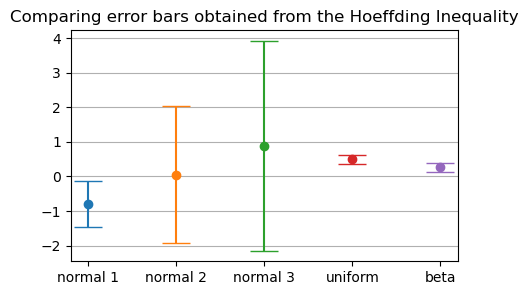

In [94]:
### Plotting CI ###
fig, ax = plt.subplots(figsize = (5, 3))
x = ["normal 1", "normal 2", "normal 3", "uniform", "beta"]
ax.errorbar(x[0], mean_norm_1, epsilon(range_norm_1), fmt= 'o', capsize=10)
ax.errorbar(x[1], mean_norm_2, epsilon(range_norm_2), fmt= 'o', capsize=10)
ax.errorbar(x[2], mean_norm_3, epsilon(range_norm_3), fmt= 'o', capsize=10)
ax.errorbar(x[3], mean_uni, epsilon(range_uniform), fmt= 'o', capsize=10)
ax.errorbar(x[4], mean_beta, epsilon(range_beta), fmt= 'o', capsize=10)
ax.grid(axis='y')
ax.set_title("Comparing error bars obtained from the Hoeffding Inequality");

**Chebyshev Inequality** In tis case again a chose a CI of $95\%$. Starting with the expression: $$ Pr(|X-\mathbb{E}[X]| \geq \epsilon) \leq \frac{Var(X)}{n \epsilon^2} $$

Then
$$ \frac{Var(X)}{n \epsilon^2} = 0.05 \longrightarrow \epsilon = \sqrt{\frac{Var(X)}{0.05*n}}$$

In [95]:
### For each distribution and using de Var estimated with Boostrap ###
def lambdas(variance, n=N):
    return np.sqrt(np.divide(variance, 0.05*n))
    
print(f'Values of lambda for each distribution:', end='\n'+'==='*10+'\n')
print(f'normal 1: {lambdas(var_norm_1)}')
print(f'normal 2: {lambdas(var_norm_2)}')
print(f'normal 3: {lambdas(var_norm_3)}')
print(f'uniform: {lambdas(var_uni)}')
print(f'beta: {lambdas(var_beta)}')

Values of lambda for each distribution:
normal 1: 0.4252053325841592
normal 2: 0.7348927177524984
normal 3: 0.9093039576593388
uniform: 0.1285862727612804
beta: 0.07001039603766383


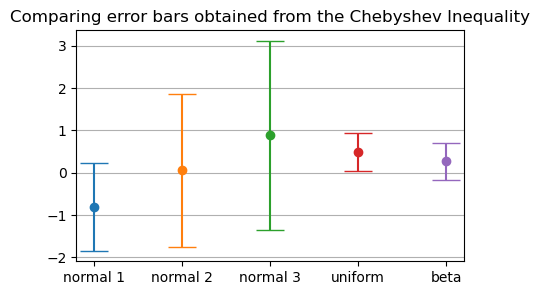

In [96]:
### Plotting CI ###
fig, ax = plt.subplots(figsize = (5, 3))
x = ["normal 1", "normal 2", "normal 3", "uniform", "beta"]
ax.errorbar(x[0], mean_norm_1, lambdas(range_norm_1), fmt= 'o', capsize=10)
ax.errorbar(x[1], mean_norm_2, lambdas(range_norm_2), fmt= 'o', capsize=10)
ax.errorbar(x[2], mean_norm_3, lambdas(range_norm_3), fmt= 'o', capsize=10)
ax.errorbar(x[3], mean_uni, lambdas(range_uniform), fmt= 'o', capsize=10)
ax.errorbar(x[4], mean_beta, lambdas(range_beta), fmt= 'o', capsize=10)
ax.grid(axis='y')
ax.set_title("Comparing error bars obtained from the Chebyshev Inequality");

Finally, to test the 68–95–99.7 rule, I'll use the estimated variance calculated via Boostrap, but taking the square root to obtain the estimated standard deviation:

In [161]:
def percentage_of_data(data, mean, variance, rule=0):
    """ rule: 1, 2, 3 refers to sigma values.
    1 means 1 sigma, then 68% of the data
    2 means 2 sigma, the 95%
    3 means 3 sigma --> 99.7%"""
    upper_bound = mean + rule*np.sqrt(variance)
    lower_bound = mean - rule*np.sqrt(variance)
    interval = list(filter(lambda x: (x <= upper_bound and x >= lower_bound), data))
    return np.round(len(interval)/len(data), 4)

In [162]:
print("Percentage of data according to the rule 68", end='\n'+'==='*15+'\n')
print(f'Normal 1: {percentage_of_data(nor_1, mean_norm_1, var_norm_1, rule=1)}')
print(f'Normal 2: {percentage_of_data(nor_2, mean_norm_2, var_norm_2, rule=1)}')
print(f'Normal 3: {percentage_of_data(nor_3, mean_norm_3, var_norm_3, rule=1)}')
print(f'Uniform: {percentage_of_data(uni, mean_uni, var_uni, rule=1)}')
print(f'Beta: {percentage_of_data(bet, mean_beta, var_beta, rule=1)}')
print("\nPercentage of data according to the rule 95", end='\n'+'==='*15+'\n')
print(f'Normal 1: {percentage_of_data(nor_1, mean_norm_1, var_norm_1, rule=2)}')
print(f'Normal 2: {percentage_of_data(nor_2, mean_norm_2, var_norm_2, rule=2)}')
print(f'Normal 3: {percentage_of_data(nor_3, mean_norm_3, var_norm_3, rule=2)}')
print(f'Uniform: {percentage_of_data(uni, mean_uni, var_uni, rule=2)}')
print(f'Beta: {percentage_of_data(bet, mean_beta, var_beta, rule=2)}')
print("\nPercentage of data according to the rule 99.7", end='\n'+'==='*15+'\n')
print(f'Normal 1: {percentage_of_data(nor_1, mean_norm_1, var_norm_1, rule=3)}')
print(f'Normal 2: {percentage_of_data(nor_2, mean_norm_2, var_norm_2, rule=3)}')
print(f'Normal 3: {percentage_of_data(nor_3, mean_norm_3, var_norm_3, rule=3)}')
print(f'Uniform: {percentage_of_data(uni, mean_uni, var_uni, rule=3)}')
print(f'Beta: {percentage_of_data(bet, mean_beta, var_beta, rule=3)}')

Percentage of data according to the rule 68
Normal 1: 0.65
Normal 2: 0.62
Normal 3: 0.65
Uniform: 0.6
Beta: 0.71

Percentage of data according to the rule 95
Normal 1: 0.95
Normal 2: 0.97
Normal 3: 0.96
Uniform: 1.0
Beta: 0.95

Percentage of data according to the rule 99.7
Normal 1: 1.0
Normal 2: 1.0
Normal 3: 1.0
Uniform: 1.0
Beta: 0.99


1. According to the results, in the case of the rule 68-$\sigma$, only the beta distribution match the minimum percentage of data at 1 $\sigma$ of the mean.
2. In the case of the rule 95-$2\sigma$, all the distirbutions worked here fit it.
3. Finally, in the case 99.7-$3\sigma$ rule, all the distributions fit the rule except, maybe by beta, but this is not clear.